# Steepest gradient descent

C:\Users\asus\AppData\Local\Temp\ipykernel_32620\1011017556.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True);


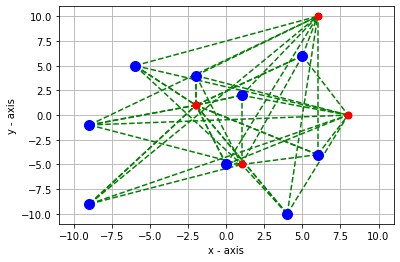

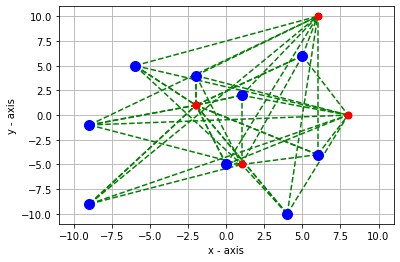

175.81043007070429
177.91390482888025


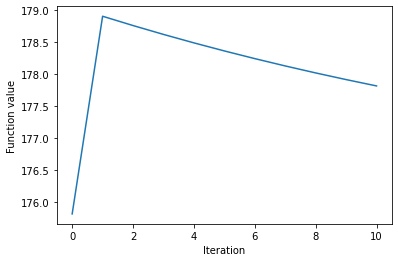

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import math
import random
# Object fun method
def funct(di, d):
  result = np.abs(di - d)
  return result

# Gradient function
def grad(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,funct_val):
  #funct_val = funct(x1, x2)
  h = 1e-9
  result = np.array([[(funct(x1+h, y1)- funct_val)/h, (funct(x1, y1+h)- funct_val)/h],
                     [(funct(x2+h, y2)- funct_val)/h, (funct(x2, y2+h)- funct_val)/h],
                     [(funct(x3+h, y3)- funct_val)/h, (funct(x3, y3+h)- funct_val)/h],
                     [(funct(x4+h, y4)- funct_val)/h, (funct(x4, y4+h)- funct_val)/h],
                     [(funct(x5+h, y5)- funct_val)/h, (funct(x5, y5+h)- funct_val)/h]
                     ])
  return result

# Distance between two point calculation
def calculateDistance(x1,y1,x2,y2):
  dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return dist

# Function to plot graph
def graphFun(x,y,x2,y2):
  for i in range(len(x)):
    for j in range(len(x2)):
      p1 = [x[i],x2[j]]
      p2= (y[i],y2[j])
      plt.plot(p1, p2, 'go', linestyle='dashed')

  plt.xlim(-11, 11)
  plt.ylim(-11, 11)

  plt.plot(x, y, 'bo', markersize=10)
  plt.plot(x2, y2, 'ro', markersize=7)
  plt.xlabel('x - axis')
  plt.ylabel('y - axis')

  plt.grid(b=True);
  plt.show()


def ObjFunc(x,y,x2,y2):
  k=0
  m=0
  Z = np.empty(45, dtype = float)
  XX = np.empty(45, dtype = float)

  for i in range(len(x)):
    for j in range(len(x2)):
      Z[m] = calculateDistance(x[i], y[i], x2[j], y2[j])
      m+=1
      k+=1

  L = math.fsum(Z)/k #average distance

  v=0
  for i in range(len(x)):
    for j in range(len(x2)):
      li = calculateDistance(x[i], y[i], x2[j], y2[j])
      XX[v]= funct(li,L)
      v+=1

  return math.fsum(XX)

x = [random.randint(-10, 10) for n in range(9)]
y = [random.randint(-10, 10) for n in range(9)]

x2 = [random.randint(-10, 10) for n in range(5)]
y2 = [random.randint(-10, 10) for n in range(5)]

graphFun(x,y,x2,y2)
step = 0.5
funct_old = ObjFunc(x,y,x2,y2)
gradient = -abs(grad(x2[0],y2[0],x2[1],y2[1],x2[2],y2[2],x2[3],y2[3],x2[4],y2[4], funct_old))

pt = np.empty([5,2], dtype = object)

for i in range(5):
  pt[i] = [x2[i],y2[i]]

direction = gradient/np.linalg.norm(gradient)
it = 0
functionValues = [funct_old]

for i in range(10):
  pt = pt-step*direction
  for j in range(5):
    x2[j] = pt[j,0]
    y2[j] = pt[j,1]


  funct_new = ObjFunc(x,y,x2,y2)
  it += 1
  #print("Iteration {:5d},f(x) {:7.6e}".format(i,np.abs(ObjFunc(x,y,x2,y2))))

  if funct_new > funct_old:
    pt= pt+step*direction
    step = step/1.05
    for j in range(5):
      x2[j] = pt[j,0]
      y2[j] = pt[j,1]

    gradient = -abs(grad(x2[0],y2[0],x2[1],y2[1],x2[2],y2[2],x2[3],y2[3],x2[4],y2[4], funct_old))
    direction = gradient/np.linalg.norm(gradient)
    it = 0
    #print("Gradient recalculated condition 1: function increases")

  elif ((it+1)%50) == 0:
    gradient = -abs(grad(x2[0],y2[0],x2[1],y2[1],x2[2],y2[2],x2[3],y2[3],x2[4],y2[4], funct_new))
    direction = gradient/np.linalg.norm(gradient)
    it = 0
    #print("Gradient recalculated condition 2: number of iterations")

  else:
   funct_old = funct_new

  functionValues.append(funct_new)
  if abs(funct_new)< 1e-9:
    break
graphFun(x,y,x2,y2)

plt.plot(functionValues)
print(functionValues[0])
print(functionValues[9])
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.show()

# Question 1

In [7]:
import numpy as np
def func1(A,b,q):
    def RowScale(A, k, scale):
        # =============================================================================
        #     A is a NumPy array.  RowScale will return duplicate array with the
        #     entries of row k multiplied by scale.
        # =============================================================================
        m = A.shape[0]  # m is number of rows in A
        nm = A.shape[1]  # n is number of columns in A

        L = np.copy(A).astype('float64')

        for j in range(nm):
            L[k][j] *= scale

        return L


    n = np.shape(A)[0]  # number of rows
    Anew = np.hstack((A, b))  # combines equations and answers
    L = np.identity(n)  # identity matrix for nxn
    U = np.zeros_like(A)  # Creates a new matrix with the first row unchanged and the rest set to zeros
    U[0] = Anew[0, :-1]  # rewrite first A line to U without changing it

    print('Initial matrix:\n', Anew)
    for i in range(n):
        for j in range(i + 1, n):
            if Anew[j, i] == 0:
                pass
            else:
                if i == 2 and Anew[3, 0] == 0 and Anew[3, 1] == 0 and Anew[3, 2] == 0 and Anew[3, 3] != 0:
                    pass
                else:
                    a1 = Anew[j, i]
                    a2 = Anew[i, i]
                    coef = float(a1 / a2)  # coefficient to modify the line
                    if coef == 0:
                        a1 = Anew[j, i + 1]
                        a2 = Anew[i, i + 1]
                        coef = float(a1 / a2)

                    eq = (Anew[j] == Anew[i]).all()

                    eq2 = (-1 * Anew[j] == Anew[i]).all()

                    eq3 = (coef * Anew[i, :-1] == Anew[j, :-1]).all()

                    if eq or eq2 or eq3:
                        Anew = RowScale(Anew, i, 2)
                    Anew[j] = Anew[j] - Anew[i] * coef
                    Anew[j, i] = 0
                    U[j] = Anew[j, :-1]  # Anew line without the last column
                    L[j, i] = coef

        print("Extended matrix after {0} iteration".format(i))
        print(Anew)

    # check if L*U = A
    print("L:")
    print(L)
    print("U:")
    print(U)
    print("L*U - A (zeros expected)")
    print(L @ U - A)

    # backward substitution (Gaussian)
    x = np.zeros((n, 1))
    for i in range(n - 1, -1, -1):
        x[i] = (Anew[i, n:] - Anew[i, i + 1:n] @ x[i + 1:n]) / Anew[i, i]
    print("SOLUTION NUMBER: ", q)
    print("Solution:")
    print(x)
    # check error
    print("Error: ")
    print((A @ x - b))
    #print("Result of numpy solver:")
    #print(np.linalg.solve(A, b))
    
A = np.array([[1, -2, 3, 4], [1, 0, -1, 1], [2, -2, 2, 5], [0, -7, 3, 1]])  # equations 1
b = np.array([[11], [-4], [7], [2]])  # answers 1
func1(A,b,1)
A = np.array([[3, 7, 1, 3], [1, -6, 6, 9], [4, 4, -7, 1], [-1, 3, 8, 2]])  # equations 2
b = np.array([[37], [11], [38], [-1]])  # answers 2
func1(A,b,2)
A = np.array([[1, 2, 0, 1], [6, -2, 3, 4], [0, 3, 4, -3], [0, -4, 3, 1]])  # equations 3
b = np.array([[2], [-15], [10], [-2]])  # answers 3
func1(A,b,3)
A = np.array([[3.0, 7.0, 1.0, 3.0], [1.0, -6.0, 6.0, 8.0], [4.0, 4.0, -7.0, 1.0], [4.0, 16.0, 2., 0.]])  # equations 4
b = np.array([[40.], [19.], [36.], [48.]])  # answers 4
func1(A,b,4)
A = np.array([[1, 2, 1, 0], [2, 5, 0, 4], [14, -8, 4, 1], [4, 10, 0, 8]])  # equations 5
b = np.array([[-4], [3], [7], [2]])  # answers 5
func1(A,b,5)


Initial matrix:
 [[ 1 -2  3  4 11]
 [ 1  0 -1  1 -4]
 [ 2 -2  2  5  7]
 [ 0 -7  3  1  2]]
Extended matrix after 0 iteration
[[  1  -2   3   4  11]
 [  0   2  -4  -3 -15]
 [  0   2  -4  -3 -15]
 [  0  -7   3   1   2]]
Extended matrix after 1 iteration
[[  1.   -2.    3.    4.   11. ]
 [  0.    4.   -8.   -6.  -30. ]
 [  0.    0.    4.    3.   15. ]
 [  0.    0.  -11.   -9.5 -50.5]]
Extended matrix after 2 iteration
[[  1.    -2.     3.     4.    11.  ]
 [  0.     4.    -8.    -6.   -30.  ]
 [  0.     0.     4.     3.    15.  ]
 [  0.     0.     0.    -1.25  -9.25]]
Extended matrix after 3 iteration
[[  1.    -2.     3.     4.    11.  ]
 [  0.     4.    -8.    -6.   -30.  ]
 [  0.     0.     4.     3.    15.  ]
 [  0.     0.     0.    -1.25  -9.25]]
L:
[[ 1.    0.    0.    0.  ]
 [ 1.    1.    0.    0.  ]
 [ 2.    1.    1.    0.  ]
 [ 0.   -1.75 -2.75  1.  ]]
U:
[[ 1 -2  3  4]
 [ 0  2 -4 -3]
 [ 0  0  4  3]
 [ 0  0  0 -1]]
L*U - A (zeros expected)
[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   

In [5]:
import numpy as np
# !!! working example (both Gaussian elimination and LU decomposition (first part) at one)
# !!! for defense, clear the code: add necessary lines and remove unnecessary ones

A = np.array([[1,2,1,0],[2,5,0,4],[14,-8,4,1],[4,10,0,8]])
b = np.array([[-4],[3],[7],[2]])

# n = np.shape(A)[0]
# Anew = np.hstack((A, b))
# L = np.identity(n)
# U = np.zeros_like(A)

U[0] = Anew[0,:-1] # rewrite first A line to U without changing it 
for i in range(n):
  for j in range(i+1,n):
    coef = Anew[j,i]/Anew[i,i] # coefficient to modify the line
    Anew[j] = Anew[j] - Anew[i]* coef
    Anew[j,i] = 0
    U[j] = Anew[j,:-1] # Anew line without the last column
    L[j,i] = coef 
  print("Extended matrix after {0} iteration".format(i))
  print(Anew)  

# # check if L*U = A
# print("L:")
# print(L)
# print("U:")
# print(U)
# print("L*U - A (zeros expected)")
# print(L@U-A)

# backward substitution (Gaussian)
x = np.zeros((n,1))
for i in range(n-1,-1,-1):
  x[i] = (Anew[i,n:]-Anew[i,i+1:n]@x[i+1:n])/Anew[i,i]

print("Solution:")
print(x)
# check error
print("Error: ")
print((A@x-b))

#print("Result of numpy solver:")
#print(np.linalg.solve(A,b))

Extended matrix after 0 iteration
[[  1.           2.           1.           0.          -4.        ]
 [  0.           2.          -4.           8.          22.        ]
 [  0.           0.         -82.         145.         459.        ]
 [  0.           0.           0.          -0.92682927  -3.6097561 ]]
Extended matrix after 1 iteration
[[  1.           2.           1.           0.          -4.        ]
 [  0.           2.          -4.           8.          22.        ]
 [  0.           0.         -82.         145.         459.        ]
 [  0.           0.           0.          -0.92682927  -3.6097561 ]]
Extended matrix after 2 iteration
[[  1.           2.           1.           0.          -4.        ]
 [  0.           2.          -4.           8.          22.        ]
 [  0.           0.         -82.         145.         459.        ]
 [  0.           0.           0.          -0.92682927  -3.6097561 ]]
Extended matrix after 3 iteration
[[  1.           2.           1.           0.

In [7]:
import numpy as np

#### example from youtube https://www.youtube.com/watch?v=zPDp_ewoyhM

def jacobian_example(x,y):

    return [[1,2],[2*x,8*y]]

def function_example(x,y):

    return [(-1)*(x+(2*y)-2),(-1)*((x**2)+(4*(y**2))-4)]
####################################################################


### agora com os dados do exercício

def jacobian_exercise(x,y,z):

    return [[1,1,1],[2*x,2*y,2*z],[np.exp(x),x,-x]]

#print (jacobian_exercise(1,2,3))
jotinha  = (jacobian_exercise(1,2,3))

def function_exercise(x,y,z):

    return [(-1)*(x+y+z-3),(-1)*((x**2)+(y**2)+(z**2)-5),(-1)*((np.exp(x))+(x*y)-(x*z)-1)]

#print (function_exercise(1,2,3))
bezao = (function_exercise(1,2,3))

def x_delta_by_gauss(J,b):

    return np.linalg.solve(J,b)

print (x_delta_by_gauss(jotinha, bezao))
x_delta_test = x_delta_by_gauss(jotinha,bezao)

def x_plus_1(x_delta,x_previous):

    x_next = x_previous + x_delta

    return x_next

print (x_plus_1(x_delta_test,[1,2,3]))

def newton_method(x_init):

    first = x_init[0]

    second = x_init[1]

    third = x_init[2]

    jacobian = jacobian_exercise(first, second, third)

    vector_b_f_output = function_exercise(first, second, third)

    x_delta = x_delta_by_gauss(jacobian, vector_b_f_output)

    x_plus_1 = x_delta + x_init

    return x_plus_1

def iterative_newton(x_init):

    counter = 0

    x_old = x_init
   #print ("x_old", x_old)

    x_new = newton_method(x_old)
   #print ("x_new", x_new)

    diff = np.linalg.norm(x_old-x_new)
   #print (diff)

    while diff>0.0000000000001:

        counter += 1

       #print ("x_old", x_old)
        x_new = newton_method(x_old)
       #print ("x_new", x_new)

        diff = np.linalg.norm(x_old-x_new)
       #print (diff)

        x_old = x_new

    convergent_val = x_new
   #print (counter)

    return convergent_val

#print (iterative_newton([1,2]))
print (list(map(float,(iterative_newton([100,200,3])))))

[-18.74823389  32.99646778 -17.24823389]
[-17.74823389  34.99646778 -14.24823389]
[-1.281670348996574e-07, 1.0000002563341195, 1.9999998718329157]


In [34]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.linalg as la





def f(w):
    x,y=w
    return np.array([
        -5*y/(x**2+1) + y**2 - x**2,

                   x**2 + y**2 - 12
  ])

def Derfx(x,y):
    return -(5*x**2 + 5 - 2*x*5*y)/(x**2 + 1)**2 + 2*y -2*x

  

def Derfy(x,y):
    return 2*x + 2*y

  



""" applying Newton method  """

def Newton(w,epsilon,max_iter):

    x,y = f(w)

    guesses=np.array([w])

    for n in range(0,max_iter):

        fx,fy=f(np.array([x,y]))

        Dfx = Derfx(x,y)

        Dfy = Derfy(x,y)
        
           

        if Dfx == 0 or Dfy==0: #or Dfz==0:

            print('Zero derivative, No solution found')

            return None

        x = x - fx/Dfx

        y=y-fy/Dfy

      

        guesses=np.append(guesses,[[x,y]],axis=0)

    return guesses


w=np.array([1.,1.])

guesses=Newton(w, 1e-10, 1) 

print("guesses : ")

print(guesses)

f1= -(5*y)/(x**2+1) + y**2 - x**2
f2= x**2 + y**2 - 12

fig = plt.figure(1,figsize=(5,5))
delta = 0.025
x,y = np.meshgrid(np.arange(-4,4.1,delta),np.arange(-4,4.1,delta))
plt.contour(x,y,f1,[0])
plt.contour(x,y,f2,[0])
plt.show()

guesses : 
[[ 1.          1.        ]
 [ 6.70541055 -6.23      ]]


NameError: name 'y' is not defined

# Question 1

[[-1.]
 [-1.]]
Iteration     0,f(x) 6.640099e+01
Iteration     1,f(x) 4.028305e+01
Iteration     2,f(x) 1.492023e+01
Iteration     3,f(x) 1.985706e+01
Iteration     4,f(x) 6.993647e+00
Iteration     5,f(x) 1.176539e+00
Iteration     6,f(x) 4.416272e+00
Iteration     7,f(x) 1.927219e+00
Iteration     8,f(x) 6.505375e+04
Iteration     9,f(x) 1.581755e+04
Iteration    10,f(x) 3.714472e+03
Iteration    11,f(x) 8.375085e+02
Iteration    12,f(x) 2.462286e+02
Iteration    13,f(x) 1.148867e+02
Iteration    14,f(x) 1.608168e+04
Iteration    15,f(x) 3.955819e+03
Iteration    16,f(x) 9.512455e+02
Iteration    17,f(x) 2.177311e+02
Iteration    18,f(x) 4.804911e+01
Iteration    19,f(x) 1.579538e+01
Iteration    20,f(x) 3.263143e+00
Iteration    21,f(x) 5.166641e+00
Iteration    22,f(x) 4.649568e+00
Iteration    23,f(x) 2.275690e+00
Iteration    24,f(x) 2.776698e+00
Iteration    25,f(x) 2.589521e+00
Iteration    26,f(x) 2.072619e+00
Iteration    27,f(x) 1.536966e+00
Iteration    28,f(x) 1.091721e+00

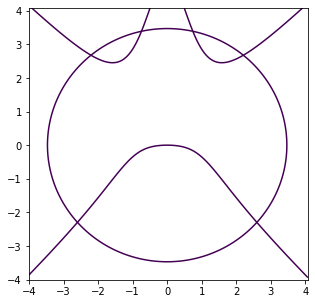

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.linalg as la
def f(w):
    x,y=w
    return np.array([
        -5*y/(x**2+1) + y**2 - x**2,

                   x**2 + y**2 - 12
  ])
def Derfx(x,y):
    return -(5*x**2 + 5 - 2*x*5*y)/(x**2 + 1)**2 + 2*y -2*x
def Derfy(x,y):
    return 2*x + 2*y



def funct(x, x1):
      return np.array([[-5*x1/(x**2+1) + x1**2 - x**2], [x**2 + x1**2 - 12]])

def dfunct(x, x1):
  result = np.array([[(-5*x**2 - 5)/(x**2 + 1)**2 + (2*x)/(x**2 + 1)**2-2*x, 2*x1 +5*x1], [2*x, 2*x1]])
  return result

  
    
    
x = -1*np.ones((2,1))
print(x)
for i in range(100):
  x = x - np.linalg.inv(dfunct(x[0,0],x[1,0]))@funct(x[0,0],x[1,0])
  print("Iteration {:5d},f(x) {:7.6e}".format(i,np.linalg.norm(funct(x[0,0],x[1,0])))) 
  if (np.linalg.norm(funct(x[0,0],x[1,0])) < 1e-6):
    break



print(x)



delta = 0.025
x,y = np.meshgrid(np.arange(-4,4.1,delta),np.arange(-4,4.1,delta))
f1= -(5*y)/(x**2+1) + y**2 - x**2
f2= x**2 + y**2 - 12
fig = plt.figure(1,figsize=(5,5))
plt.contour(x,y,f1,[0])
plt.contour(x,y,f2,[0])
plt.show()

[[-1.  1.]]
Iteration     0,f(x) 5.000714e-01
Iteration     1,f(x) 1.554840e-01
Iteration     2,f(x) 3.778790e-03
Iteration     3,f(x) 8.489697e-02
Gradient recalculated condition 1: function increases
Iteration     4,f(x) 7.513920e-02
Gradient recalculated condition 1: function increases
Iteration     5,f(x) 6.642146e-02
Gradient recalculated condition 1: function increases
Iteration     6,f(x) 5.863697e-02
Gradient recalculated condition 1: function increases
Iteration     7,f(x) 5.168988e-02
Gradient recalculated condition 1: function increases
Iteration     8,f(x) 4.549412e-02
Gradient recalculated condition 1: function increases
Iteration     9,f(x) 3.997241e-02
Gradient recalculated condition 1: function increases
Iteration    10,f(x) 3.505535e-02
Gradient recalculated condition 1: function increases
Iteration    11,f(x) 3.068057e-02
Gradient recalculated condition 1: function increases
Iteration    12,f(x) 2.679206e-02
Gradient recalculated condition 1: function increases
Iterat

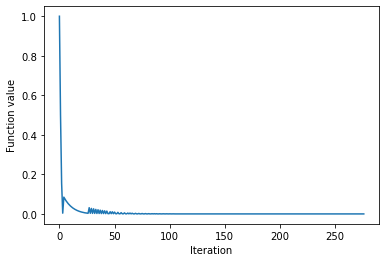

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
# gradient descent method
def funct(x1, x2):
  result = (x1**2+x2**2-3)**2+ (x1**2-x2**2)**2
  return result

def grad(x1, x2):
  #result = np.array([4*(x1**2+x2**2-3)*x1+4*(x1**2-x2**2)*x1, 4*(x1**2+x2**2-3)*x2+4*(x1**2-x2**2)*x2])
  funct_val = funct(x1, x2)
  h = 1e-9
  result = np.array([(funct(x1+h, x2)- funct_val)/h, (funct(x1, x2+h)- funct_val)/h])

  return result

x = -1*np.ones((1,2))
x[0,1] = 1
print(x)
step = 0.1
funct_old = funct(x[0,0],x[0,1])
gradient = grad(x[0,0],x[0,1])
direction = gradient/np.linalg.norm(gradient)
iterationsInSameDirection = 0
functionValues = [funct_old]
for i in range(1000):
  
  
  x = x - step*direction
  funct_new = funct(x[0,0],x[0,1])
  iterationsInSameDirection += 1
  print("Iteration {:5d},f(x) {:7.6e}".format(i,np.abs(funct(x[0,0],x[0,1]))))
  if funct_new > funct_old:
    x = x + step*direction
    step = step /1.05
    gradient = grad(x[0,0],x[0,1])
    direction = gradient/np.linalg.norm(gradient)
    iterationsInSameDirection = 0
    print("Gradient recalculated condition 1: function increases")
  elif ((iterationsInSameDirection+1)%50) == 0:
    gradient = grad(x[0,0],x[0,1])
    direction = gradient/np.linalg.norm(gradient) 
    iterationsInSameDirection = 0
    print("Gradient recalculated condition 2: number of iterations")    
  else:
   funct_old =   funct_new
  functionValues.append(funct_new)  
  if abs(funct_new)< 1e-9:
    break

plt.plot(functionValues)
plt.xlabel('Iteration')
plt.ylabel('Function value')
print(x)
print(np.abs(funct(x[0,0],x[0,1])))

plt.show()